In [ ]:
# %%
import pandas as pd
df1 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/01_TB1_CProtetta2020.xls")


new_columns = [
    'Regione',
    'lunghezza_costa_km_2000',
    'costa_protetta_km_2000',
    'costa_protetta_percentuale_2000',
    'lunghezza_costa_km_2006',
    'costa_protetta_km_2006',
    'costa_protetta_percentuale_2006',
    'lunghezza_costa_km_2020',
    'costa_protetta_km_2020',
    'costa_protetta_percentuale_2020',
    'lunghezza_spiagge_km',
    'quota_spiaggia_percentuale',
    'lunghezza_spiagge_protette_km',
    'componente_spiagge_protette_percentuale',
    'costa_naturale_km',
    'costa_artificiale_km',
    'tratti_fittizi_km'
]

df1.columns = new_columns
df1 = df1.iloc[1:].reset_index(drop=True)

for col in df1.columns:
    if col != 'Regione':
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

df1 = df1.drop(0, axis=0)

# Separa la riga dell'Italia dal resto dei dati
italia_row = df1[df1['Regione'] == 'ITALIA'].copy()
other_rows = df1[df1['Regione'] != 'ITALIA'].copy()


# Ordina prima per area geografica e poi per regione
other_rows = other_rows.sort_values(['Regione'])

# Aggiungi una colonna Area_Geografica anche alla riga Italia (opzionale)
italia_row['Area_Geografica'] = 'TOTALE'

# Concatena le regioni ordinate con la riga dell'Italia in fondo
df1 = pd.concat([other_rows, italia_row]).reset_index(drop=True)

# Fai partire l'indice da 1
df1.index = df1.index + 1

df1

,Regione,lunghezza_costa_km_2000,costa_protetta_km_2000,costa_protetta_percentuale_2000,lunghezza_costa_km_2006,costa_protetta_km_2006,costa_protetta_percentuale_2006,lunghezza_costa_km_2020,costa_protetta_km_2020,costa_protetta_percentuale_2020,lunghezza_spiagge_km,quota_spiaggia_percentuale,lunghezza_spiagge_protette_km,componente_spiagge_protette_percentuale,costa_naturale_km,costa_artificiale_km,tratti_fittizi_km,Area_Geografica
1,Abruzzo,129.014,56.277433,43.621183,129.295,70.854,54.800263,130.077,78.496,60.345795,99.653238,76.610960,57.295704,57.495075,59.032714,15.760827,3.702708,NaN
2,Basilicata,65.783,0.261102,0.396914,65.572,0.978,1.491490,68.728,5.809,8.452159,40.425208,58.819125,4.860644,12.023795,5.006122,0.504455,0.298304,NaN
3,Calabria,734.278,99.064272,13.491385,734.381,111.982,15.248488,745.225,166.867,22.391493,566.841730,76.063166,99.989513,17.639759,110.203024,38.735203,17.929031,NaN
4,Campania,505.373,104.875819,20.752161,502.152,113.500,22.602718,511.456,137.231,26.831438,185.786804,36.325081,58.171657,31.310974,78.018658,41.292019,17.920526,NaN
5,Emilia-Romagna,124.000,65.940000,53.177419,124.058,67.079,54.070677,124.841,64.900,51.986126,98.120403,78.596297,51.989477,52.985389,52.453984,8.162440,4.284067,NaN
6,Friuli-Venezia Giulia,115.897,39.490986,34.074209,116.232,42.139,36.254216,115.482,45.069,39.026861,46.712185,40.449754,15.983385,34.216736,20.949389,18.127279,5.992681,NaN
7,Lazio,383.468,68.322776,17.817074,379.546,73.163,19.276451,385.707,97.356,25.240921,229.879219,59.599442,62.173106,27.045988,68.572483,13.221091,15.562355,NaN
8,Liguria,377.312,123.042957,32.610401,377.510,132.430,35.079865,382.410,144.219,37.713187,105.706633,27.642225,65.054236,61.542246,84.222660,42.854158,17.142374,NaN
9,Marche,177.104,102.872636,58.086004,175.928,115.854,65.853076,178.622,120.725,67.586859,130.261624,72.925857,93.040845,71.426136,97.154057,18.881948,4.688736,NaN
10,Molise,37.060,19.180229,51.754530,36.621,24.345,66.478250,38.404,25.197,65.610353,33.158709,86.341811,21.326843,64.317471,21.355227,1.909670,1.932193,NaN


In [ ]:
# %%

import pandas as pd
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA'].copy()
 
# Calcoliamo la lunghezza totale della costa usando .loc[]
df1_filtered.loc[:, 'costa_totale_km'] = df1_filtered['costa_naturale_km'] + df1_filtered['costa_artificiale_km']
 
# Creazione della tabella
costa_completa = df1_filtered[['Regione', 'costa_naturale_km', 'costa_artificiale_km', 'costa_totale_km']]
print("Confronto tra costa naturale, costa artificiale e costa totale:")
costa_completa

Confronto tra costa naturale, costa artificiale e costa totale:


,Regione,costa_naturale_km,costa_artificiale_km,costa_totale_km
1,Abruzzo,59.032714,15.760827,74.793541
2,Basilicata,5.006122,0.504455,5.510577
3,Calabria,110.203024,38.735203,148.938227
4,Campania,78.018658,41.292019,119.310677
5,Emilia-Romagna,52.453984,8.162440,60.616424
6,Friuli-Venezia Giulia,20.949389,18.127279,39.076668
7,Lazio,68.572483,13.221091,81.793574
8,Liguria,84.222660,42.854158,127.076818
9,Marche,97.154057,18.881948,116.036005
10,Molise,21.355227,1.909670,23.264897


In [ ]:
# %%
import pandas as pd
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA'].copy()
 
# Calcoliamo le variazioni percentuali
df1_filtered['2000-2006'] = df1_filtered['costa_protetta_percentuale_2006'] - df1_filtered['costa_protetta_percentuale_2000']
df1_filtered['2006-2020'] = df1_filtered['costa_protetta_percentuale_2020'] - df1_filtered['costa_protetta_percentuale_2006']
df1_filtered['2000-2020'] = df1_filtered['costa_protetta_percentuale_2020'] - df1_filtered['costa_protetta_percentuale_2000']
 
# Creazione della tabella
costa_protetta_tabella = df1_filtered[['Regione', 'costa_protetta_percentuale_2000', 'costa_protetta_percentuale_2006', 'costa_protetta_percentuale_2020', '2000-2006', '2006-2020', '2000-2020']]
 
# Rinominiamo le colonne
costa_protetta_tabella = costa_protetta_tabella.rename(columns={
    'costa_protetta_percentuale_2000': 'costa_protetta_%_2000',
    'costa_protetta_percentuale_2006': 'costa_protetta_%_2006',
    'costa_protetta_percentuale_2020': 'costa_protetta_%_2020'
})
 
print("Distribuzione della percentuale di costa protetta e variazioni:")
costa_protetta_tabella

Distribuzione della percentuale di costa protetta e variazioni:


,Regione,costa_protetta_%_2000,costa_protetta_%_2006,costa_protetta_%_2020,2000-2006,2006-2020,2000-2020
1,Abruzzo,43.621183,54.800263,60.345795,11.179080,5.545532,16.724612
2,Basilicata,0.396914,1.491490,8.452159,1.094576,6.960669,8.055245
3,Calabria,13.491385,15.248488,22.391493,1.757103,7.143005,8.900108
4,Campania,20.752161,22.602718,26.831438,1.850557,4.228720,6.079277
5,Emilia-Romagna,53.177419,54.070677,51.986126,0.893257,-2.084550,-1.191293
6,Friuli-Venezia Giulia,34.074209,36.254216,39.026861,2.180007,2.772645,4.952652
7,Lazio,17.817074,19.276451,25.240921,1.459377,5.964470,7.423847
8,Liguria,32.610401,35.079865,37.713187,2.469464,2.633322,5.102786
9,Marche,58.086004,65.853076,67.586859,7.767072,1.733783,9.500855
10,Molise,51.754530,66.478250,65.610353,14.723720,-0.867897,13.855823


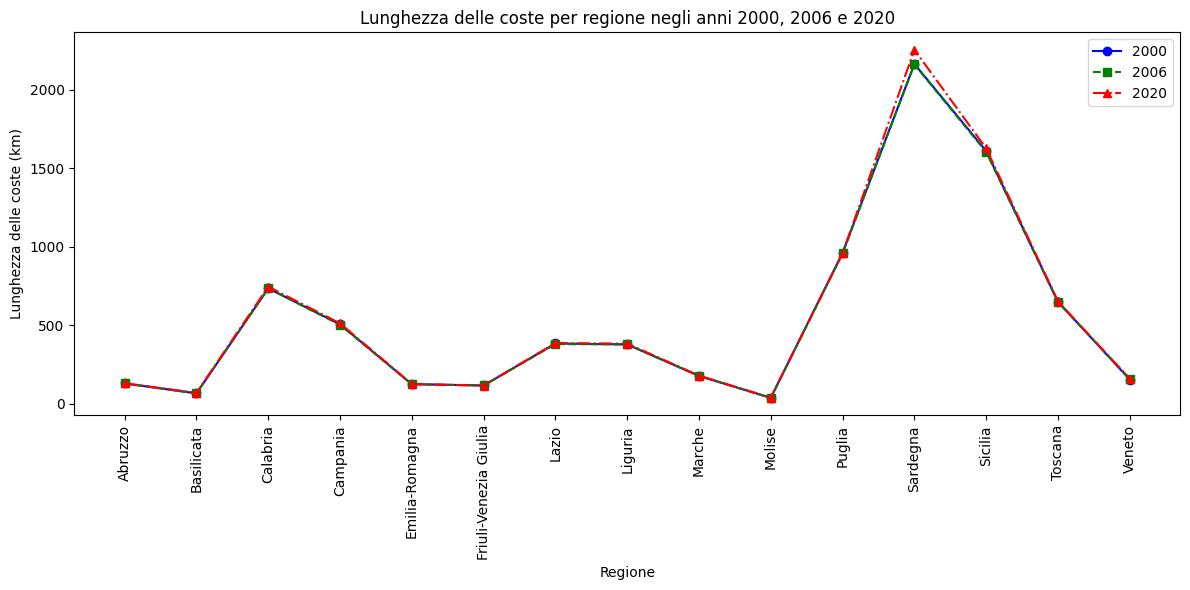

In [ ]:
# %%

import matplotlib.pyplot as plt
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA']
 
# Dati per la creazione del grafico
regions = df1_filtered['Regione']
 
# Lunghezze delle coste per ciascun anno
length_2000 = df1_filtered['lunghezza_costa_km_2000']
length_2006 = df1_filtered['lunghezza_costa_km_2006']
length_2020 = df1_filtered['lunghezza_costa_km_2020']
 
# Creazione della figura
fig, ax = plt.subplots(figsize=(12, 6))
 
# Plotting dei dati
ax.plot(regions, length_2000, marker='o', linestyle='-', color='blue', label='2000')
ax.plot(regions, length_2006, marker='s', linestyle='--', color='green', label='2006')
ax.plot(regions, length_2020, marker='^', linestyle='-.', color='red', label='2020')
 
# Aggiunta di etichette e titolo
ax.set_xlabel('Regione')
ax.set_ylabel('Lunghezza delle coste (km)')
ax.set_title('Lunghezza delle coste per regione negli anni 2000, 2006 e 2020')
 
# Rotazione delle etichette dell'asse x per migliorare la leggibilità
plt.xticks(rotation=90)
 
# Aggiunta della legenda
ax.legend()
 
# Adattiamo il layout
plt.tight_layout()
plt.show()

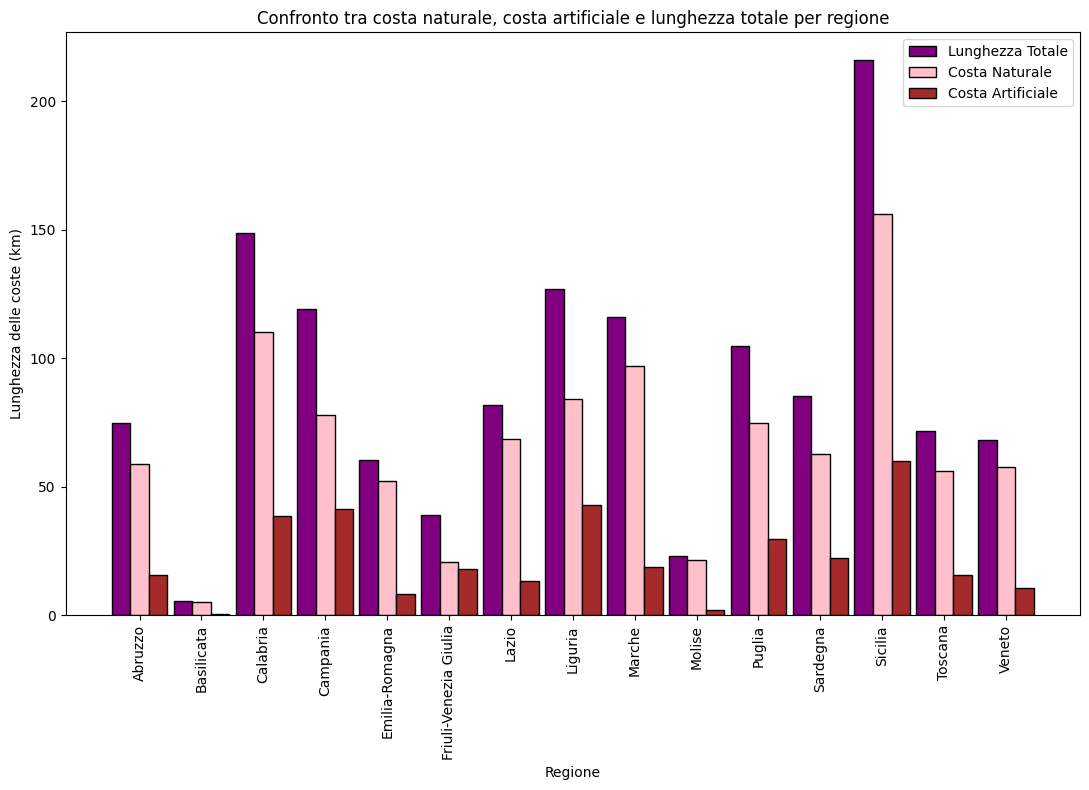

In [ ]:
#%%

import pandas as pd
import matplotlib.pyplot as plt
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA']
 
# Dati per la creazione del grafico
regions = df1_filtered['Regione']
costa_naturale = df1_filtered['costa_naturale_km']
costa_artificiale = df1_filtered['costa_artificiale_km']
lunghezza_totale = df1_filtered[['costa_naturale_km', 'costa_artificiale_km']].sum(axis=1)
 
# Creazione della figura
fig, ax = plt.subplots(figsize=(11, 8))
 
# Larghezza delle barre
bar_width = 0.3
 
# Posizioni delle barre sul grafico
r1 = range(len(regions))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
 
# Plotting dei dati
ax.bar(r1, lunghezza_totale, color='purple', width=bar_width, edgecolor='black', label='Lunghezza Totale')
ax.bar(r2, costa_naturale, color='pink', width=bar_width, edgecolor='black', label='Costa Naturale')
ax.bar(r3, costa_artificiale, color='brown', width=bar_width, edgecolor='black', label='Costa Artificiale')
 
# Aggiunta di etichette e titolo
ax.set_xlabel('Regione')
ax.set_ylabel('Lunghezza delle coste (km)')
ax.set_title('Confronto tra costa naturale, costa artificiale e lunghezza totale per regione', loc='center')
ax.set_xticks([r + bar_width for r in range(len(regions))])
ax.set_xticklabels(regions, rotation=90)
 
# Aggiunta della legenda
ax.legend()
 
# Adattiamo il layout
plt.tight_layout()
plt.show()

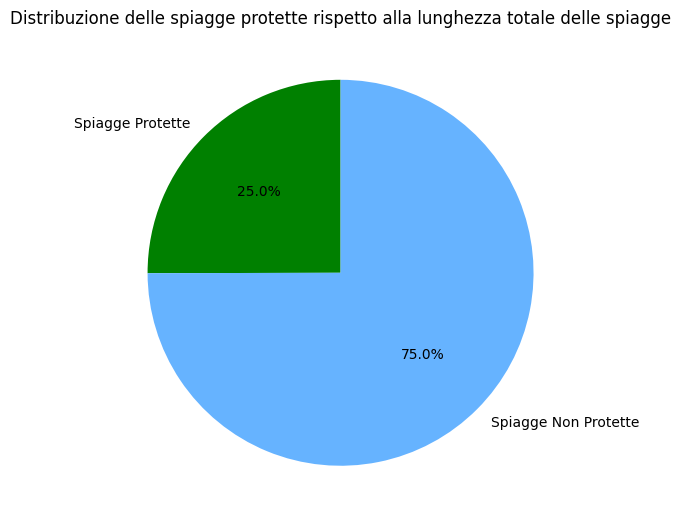

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA']
 
# Calcoliamo le somme totali delle spiagge e delle spiagge protette
totale_spiagge = df1_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette = df1_filtered['lunghezza_spiagge_protette_km'].sum()
 
# Creiamo i dati per il grafico a torta
labels = ['Spiagge Protette', 'Spiagge Non Protette']
sizes = [totale_spiagge_protette, totale_spiagge - totale_spiagge_protette]
colors = ['green','#66b3ff']
 
# Creazione del grafico a torta
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Distribuzione delle spiagge protette rispetto alla lunghezza totale delle spiagge')
 
# Adattiamo il layout
plt.tight_layout()
plt.show()

In [ ]:
# %%

import pandas as pd
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA'].copy()
 
# Calcoliamo la lunghezza totale della costa usando .loc[]
df1_filtered.loc[:, 'costa_totale_km'] = df1_filtered['costa_naturale_km'] + df1_filtered['costa_artificiale_km']
 
# Creazione della tabella
costa_completa = df1_filtered[['Regione', 'costa_naturale_km', 'costa_artificiale_km', 'costa_totale_km']]
print("Confronto tra costa naturale, costa artificiale e costa totale:")
costa_completa

Confronto tra costa naturale, costa artificiale e costa totale:


,Regione,costa_naturale_km,costa_artificiale_km,costa_totale_km
1,Abruzzo,59.032714,15.760827,74.793541
2,Basilicata,5.006122,0.504455,5.510577
3,Calabria,110.203024,38.735203,148.938227
4,Campania,78.018658,41.292019,119.310677
5,Emilia-Romagna,52.453984,8.162440,60.616424
6,Friuli-Venezia Giulia,20.949389,18.127279,39.076668
7,Lazio,68.572483,13.221091,81.793574
8,Liguria,84.222660,42.854158,127.076818
9,Marche,97.154057,18.881948,116.036005
10,Molise,21.355227,1.909670,23.264897


In [ ]:
#%%

import pandas as pd
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA'].copy()
 
# Calcoliamo le somme totali delle spiagge e delle spiagge protette
totale_spiagge = df1_filtered['lunghezza_spiagge_km'].sum()
totale_spiagge_protette = df1_filtered['lunghezza_spiagge_protette_km'].sum()
percentuale_spiagge_protette = (totale_spiagge_protette / totale_spiagge) * 100
 
# Creazione della tabella
distribuzione_spiagge = {
    'Tipo di Spiaggia': ['Spiagge Protette', 'Spiagge Non Protette', 'Totale Spiagge'],
    'Lunghezza (km)': [totale_spiagge_protette, totale_spiagge - totale_spiagge_protette, totale_spiagge],
    'Percentuale (%)': [percentuale_spiagge_protette, 100 - percentuale_spiagge_protette, 100]
}
 
spiagge_protette_tabella = pd.DataFrame(distribuzione_spiagge)
print("Distribuzione delle spiagge protette rispetto alla lunghezza totale delle spiagge:")
spiagge_protette_tabella

Distribuzione delle spiagge protette rispetto alla lunghezza totale delle spiagge:


,Tipo di Spiaggia,Lunghezza (km),Percentuale (%)
0,Spiagge Protette,841.982508,25.035006
1,Spiagge Non Protette,2521.238203,74.964994
2,Totale Spiagge,3363.220711,100.000000


In [ ]:
# %%

import pandas as pd
 
# Rimuoviamo la riga "Italia" dal dataset
df1_filtered = df1[df1['Regione'] != 'ITALIA'].copy()
 
# Calcoliamo le variazioni in chilometri
df1_filtered['2000-2006'] = df1_filtered['costa_protetta_km_2006'] - df1_filtered['costa_protetta_km_2000']
df1_filtered['2006-2020'] = df1_filtered['costa_protetta_km_2020'] - df1_filtered['costa_protetta_km_2006']
df1_filtered['2000-2020'] = df1_filtered['costa_protetta_km_2020'] - df1_filtered['costa_protetta_km_2000']
 
# Creazione della tabella
costa_protetta_tabella = df1_filtered[['Regione', 'costa_protetta_km_2000', 'costa_protetta_km_2006', 'costa_protetta_km_2020', '2000-2006', '2006-2020', '2000-2020']]
 
# Rinominiamo le colonne
costa_protetta_tabella = costa_protetta_tabella.rename(columns={
    'costa_protetta_km_2000': 'Costa Protetta 2000 (km)',
    'costa_protetta_km_2006': 'Costa Protetta 2006 (km)',
    'costa_protetta_km_2020': 'Costa Protetta 2020 (km)',
    '2000-2006': '2000-2006 (km)',
    '2006-2020': '2006-2020 (km)',
    '2000-2020': '2000-2020 (km)'
})
 
print("Distribuzione della lunghezza della costa protetta e variazioni:")
costa_protetta_tabella

Distribuzione della lunghezza della costa protetta e variazioni:


,Regione,Costa Protetta 2000 (km),Costa Protetta 2006 (km),Costa Protetta 2020 (km),2000-2006 (km),2006-2020 (km),2000-2020 (km)
1,Abruzzo,56.277433,70.854,78.496,14.576567,7.642,22.218567
2,Basilicata,0.261102,0.978,5.809,0.716898,4.831,5.547898
3,Calabria,99.064272,111.982,166.867,12.917728,54.885,67.802728
4,Campania,104.875819,113.500,137.231,8.624181,23.731,32.355181
5,Emilia-Romagna,65.940000,67.079,64.900,1.139000,-2.179,-1.040000
6,Friuli-Venezia Giulia,39.490986,42.139,45.069,2.648014,2.930,5.578014
7,Lazio,68.322776,73.163,97.356,4.840224,24.193,29.033224
8,Liguria,123.042957,132.430,144.219,9.387043,11.789,21.176043
9,Marche,102.872636,115.854,120.725,12.981364,4.871,17.852364
10,Molise,19.180229,24.345,25.197,5.164771,0.852,6.016771
